In [285]:
import pandas as pd
import numpy as np

In [292]:
violation_data = "~/Downloads/violation_counts_grouped.csv"
city_data = "final_project/new_inspection_data_2019.csv"

In [294]:
violation_df = pd.read_csv(violation_data)

In [295]:
data_df = pd.read_csv(city_data)

In [404]:
df = pd.merge(violation_df,
              data_df[['inspection_id','inspection_type','risk','results','aka_name','latitude','longitude']],
              on = 'inspection_id')

In [405]:
df = df.drop(['Unnamed: 0'],axis=1)

In [406]:
df.head()

,inspection_id,license_,violation_count,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance,inspection_type,risk,results,aka_name,latitude,longitude
0,2320519,2002822.0,0,0,0,0,0,0,0,0,Complaint Re-Inspection,Risk 1 (High),Pass,SALAM RESTAURANT,41.965719,-87.708538
1,2320509,2694960.0,8,3,1,0,0,0,4,0,License Re-Inspection,Risk 1 (High),Fail,TAQUERIA EL DORADO,41.968820,-87.682292
2,2320368,2215799.0,3,0,1,0,0,0,2,0,License,Risk 1 (High),Pass,GADS HILL CHILD CARE CENTER,41.862273,-87.692703
3,2320374,1909364.0,5,1,0,0,1,1,1,1,Complaint Re-Inspection,Risk 2 (Medium),Fail,DUNKIN DONUTS/BASKIN ROBBINS,41.766871,-87.722317
4,2320419,2689437.0,4,0,0,1,2,0,1,0,License,Risk 3 (Low),Fail,FULLERTON DOLLAR PLUS,41.923991,-87.756519


In [407]:
df['logistic_model_prediction'] = np.zeros(len(df.risk))
df['random_forest_prediction'] = np.zeros(len(df.risk))

In [390]:
col = []

for index, row in df.iterrows():
#     print(row.results)
    if (row.results == 'Pass w/ Conditions'):
        col.append(1)
    elif (row.results == 'Pass'):
        col.append(1)
    elif (row.results == 'Fail'):
        col.append(0)
    else:
        col.append(3)

In [391]:
df['binary_results'] = col

In [392]:
len(df['binary_results'])

14063

In [393]:
df.drop(df[df['binary_results']==3].index, inplace = True)

In [394]:
df['risk'] = df['risk'].apply(str)

In [395]:
inspection_type_OH = pd.get_dummies(df['inspection_type'])

In [396]:
risk_OH = pd.get_dummies(df['risk'])

In [397]:
df = df.drop(['inspection_type','risk','results'],axis=1)
df.head()

,inspection_id,license_,violation_count,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance,binary_results
0,2320519,2002822.0,0,0,0,0,0,0,0,0,1
1,2320509,2694960.0,8,3,1,0,0,0,4,0,0
2,2320368,2215799.0,3,0,1,0,0,0,2,0,1
3,2320374,1909364.0,5,1,0,0,1,1,1,1,0
4,2320419,2689437.0,4,0,0,1,2,0,1,0,0


In [398]:
df = pd.concat([df,inspection_type_OH,risk_OH], axis=1)

In [399]:
from sklearn.model_selection import train_test_split
y = df.binary_results
X = df.drop(['binary_results','inspection_id','license_'], axis=1)
# X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=0)

# my_cols = data[['risk','inspection_type']].columns
# X_train = X_train_full[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()

In [200]:
# # get the dummies (one hot encoding)

# X_train_OH = pd.get_dummies(X_train['risk'])
# X_valid_OH = pd.get_dummies(X_valid['risk'])

# X_train_OH_2 = pd.get_dummies(X_train['inspection_type'])
# X_valid_OH_2 = pd.get_dummies(X_valid['inspection_type'])

In [201]:
# # concatenate all of the columns together

# OH_X_train = pd.concat([X_train['avg_violations'],X_train['times_inspected'], X_train_OH, X_train_OH_2], axis=1)
# OH_X_valid = pd.concat([X_valid['avg_violations'],X_valid['times_inspected'], X_valid_OH, X_valid_OH_2], axis=1)

In [282]:
OH_X_valid = OH_X_valid.drop(['logistic_model_prediction'],axis=1)

In [283]:
OH_X_valid.columns

Index(['avg_violations', 'times_inspected', 'Risk 1 (High)', 'Risk 2 (Medium)',
       'Risk 3 (Low)', 'Canvass', 'Canvass Re-Inspection', 'Complaint',
       'Complaint Re-Inspection', 'License', 'License Re-Inspection',
       'Recent Inspection', 'Short Form Complaint', 'Suspected Food Poisoning',
       'Suspected Food Poisoning Re-inspection', 'Consultation'],
      dtype='object')

In [373]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, accuracy_score

# Function for comparing different approaches
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_preds_valid = rf_model.predict(X_valid)
rf_preds_train = rf_model.predict(X_train)
rf_score_valid = rf_model.score(X_valid, y_valid)
rf_score_train = rf_model.score(X_train, y_train)

rf_accuracy_score = accuracy_score(y_valid,rf_preds_valid)
# return mean_squared_error(y_valid, preds_valid), r2_score(y_valid, preds_valid), preds_valid, preds_train, score_valid, score_train



logistic_model = LogisticRegression(solver='lbfgs',max_iter=500)
logistic_model.fit(X_train, y_train)
logistic_preds_valid = logistic_model.predict(X_valid)
logistic_preds_train = logistic_model.predict(X_train)
logistic_score_valid = logistic_model.score(X_valid, y_valid)
logistic_score_train = logistic_model.score(X_train, y_train)

y_score = logistic_model.decision_function(X_valid)
logistic_avg_precision = average_precision_score(y_valid, y_score)

logistic_accuracy_score = accuracy_score(y_valid,logistic_preds_valid)

# return mean_squared_error(y_valid, preds_valid), r2_score(y_valid, preds_valid), preds_valid, preds_train, score_valid, score_train

In [374]:
# Random Forest Classification model

print(f"training score: {rf_score_train}")
print(f"testing/validating score: {rf_score_valid}")
print('Accuracy score: {0:0.2f}'.format(rf_accuracy_score))

training score: 0.9546061415220294
testing/validating score: 0.8390143737166325
Accuracy score: 0.84


In [375]:
# Logistic Regression model

print(f"training score: {logistic_score_train}")
print(f"testing/validating score: {logistic_score_valid}")
print('Average precision-recall score: {0:0.2f}'.format(logistic_avg_precision))
print('Accuracy score: {0:0.2f}'.format(logistic_accuracy_score))

training score: 0.8394782787306152
testing/validating score: 0.8340862422997947
Average precision-recall score: 0.95
Accuracy score: 0.83


In [359]:
# Logistic one hot encoding predictions

preds_valid = score_dataset(X_train, X_valid, y_train, y_valid)[2]
preds_train = score_dataset(X_train, X_valid, y_train, y_valid)[3]
np.unique(preds_valid,return_counts = True)

(array([0, 1]), array([ 407, 2028]))

In [363]:
# Random Forest one hot encoding predictions

preds_valid = score_dataset(X_train, X_valid, y_train, y_valid)[2]
preds_train = score_dataset(X_train, X_valid, y_train, y_valid)[3]
np.unique(preds_valid,return_counts = True)

(array([0, 1]), array([ 475, 1960]))

In [400]:
rf_full_predictions = rf_model.predict(X)
logistic_full_predictions = logistic_model.predict(X)

In [401]:
X['logistic_model_predictions'] = logistic_full_predictions
X['random_forest_predictions'] = rf_full_predictions

In [402]:
X.head()

,violation_count,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance,Canvass,Canvass Re-Inspection,...,License Re-Inspection,Recent Inspection,Short Form Complaint,Suspected Food Poisoning,Suspected Food Poisoning Re-inspection,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low),logistic_model_predictions,random_forest_predictions
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,8,3,1,0,0,0,4,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,3,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,5,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,0,1,2,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [403]:
prediction_indices = X.index

In [409]:
for x in prediction_indices:
    df.loc[x, 'logistic_model_prediction'] = X.loc[x]['logistic_model_predictions']
    df.loc[x, 'random_forest_prediction'] = X.loc[x]['random_forest_predictions']    

In [410]:
df.head()

,inspection_id,license_,violation_count,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance,inspection_type,risk,results,aka_name,latitude,longitude,logistic_model_prediction,random_forest_prediction
0,2320519,2002822.0,0,0,0,0,0,0,0,0,Complaint Re-Inspection,Risk 1 (High),Pass,SALAM RESTAURANT,41.965719,-87.708538,1.0,1.0
1,2320509,2694960.0,8,3,1,0,0,0,4,0,License Re-Inspection,Risk 1 (High),Fail,TAQUERIA EL DORADO,41.968820,-87.682292,1.0,0.0
2,2320368,2215799.0,3,0,1,0,0,0,2,0,License,Risk 1 (High),Pass,GADS HILL CHILD CARE CENTER,41.862273,-87.692703,1.0,1.0
3,2320374,1909364.0,5,1,0,0,1,1,1,1,Complaint Re-Inspection,Risk 2 (Medium),Fail,DUNKIN DONUTS/BASKIN ROBBINS,41.766871,-87.722317,0.0,0.0
4,2320419,2689437.0,4,0,0,1,2,0,1,0,License,Risk 3 (Low),Fail,FULLERTON DOLLAR PLUS,41.923991,-87.756519,0.0,0.0


In [411]:
df['logistic_model_prediction'] = df['logistic_model_prediction'].fillna(0)
df['random_forest_prediction'] = df['random_forest_prediction'].fillna(0)

In [412]:
df.head()

,inspection_id,license_,violation_count,Management,Hygienic Practices,Food Preperation,Pests & Rodents,Utensils & Equipment,Phyiscal Facilities,Compliance,inspection_type,risk,results,aka_name,latitude,longitude,logistic_model_prediction,random_forest_prediction
0,2320519,2002822.0,0,0,0,0,0,0,0,0,Complaint Re-Inspection,Risk 1 (High),Pass,SALAM RESTAURANT,41.965719,-87.708538,1.0,1.0
1,2320509,2694960.0,8,3,1,0,0,0,4,0,License Re-Inspection,Risk 1 (High),Fail,TAQUERIA EL DORADO,41.968820,-87.682292,1.0,0.0
2,2320368,2215799.0,3,0,1,0,0,0,2,0,License,Risk 1 (High),Pass,GADS HILL CHILD CARE CENTER,41.862273,-87.692703,1.0,1.0
3,2320374,1909364.0,5,1,0,0,1,1,1,1,Complaint Re-Inspection,Risk 2 (Medium),Fail,DUNKIN DONUTS/BASKIN ROBBINS,41.766871,-87.722317,0.0,0.0
4,2320419,2689437.0,4,0,0,1,2,0,1,0,License,Risk 3 (Low),Fail,FULLERTON DOLLAR PLUS,41.923991,-87.756519,0.0,0.0


In [413]:
df.to_csv('model_results_full.csv',encoding='utf-8',index=False)

In [415]:
col = []

for index, row in df.iterrows():
#     print(row.results)
    if (row.results == 'Pass w/ Conditions'):
        col.append(1)
    elif (row.results == 'Pass'):
        col.append(1)
    elif (row.results == 'Fail'):
        col.append(0)
    else:
        col.append(3)

In [416]:
df['binary_results'] = col

In [417]:
df.to_csv('model_results_full.csv',encoding='utf-8',index=False)

In [264]:
OH_X_valid['logistic_model_prediction'] = preds_valid

In [265]:
OH_X_valid.head()

,avg_violations,times_inspected,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low),Canvass,Canvass Re-Inspection,Complaint,Complaint Re-Inspection,License,License Re-Inspection,Recent Inspection,Short Form Complaint,Suspected Food Poisoning,Suspected Food Poisoning Re-inspection,Consultation,logistic_model_prediction
8725,3.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1
7914,12.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1
12131,1.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1
5445,8.0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1
1871,0.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,1


In [266]:
prediction_indices = OH_X_valid.index

In [267]:
for x in prediction_indices:
    data.loc[x, 'logistic_model_prediction'] = OH_X_valid.loc[x]['logistic_model_prediction']

In [273]:
# data['logistic_model_prediction'] = data['logistic_model_prediction'].fillna(0)
# data.loc[data['binary_results']==2].head()

In [277]:
data.to_csv('model_results.csv',encoding='utf-8',index=False)

In [275]:
!pwd

/Users/evanstroh/Documents/Data_Science_Bootcamp/local_git_repository


In [229]:
OH_X_valid.index

Int64Index([ 8725,  7914, 12131,  5445,  1871, 10535,  4823, 11113,  5784,
             3188,
            ...
            11064,  4771,  1577,  1041,  3864,  7679,  7876,  4537, 11501,
             8703],
           dtype='int64', length=2118)

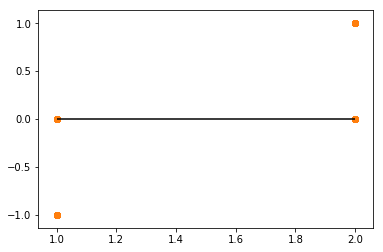

In [179]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(preds_valid, preds_valid - y_valid)
plt.hlines(y=0, xmin=preds_valid.min(), xmax=preds_valid.max())
plt.scatter(preds_train, preds_train - y_train)
plt.show()

In [180]:
# random forest

import statsmodels.api as sm
model = sm.OLS(y_valid, OH_X_valid)
results = model.fit()
print(results.summary2())

                           Results: Ordinary least squares
Model:                     OLS                    Adj. R-squared:           0.140    
Dependent Variable:        binary_results         AIC:                      1941.0061
Date:                      2019-10-27 18:42       BIC:                      2020.2213
No. Observations:          2118                   Log-Likelihood:           -956.50  
Df Model:                  13                     F-statistic:              27.41    
Df Residuals:              2104                   Prob (F-statistic):       1.19e-62 
R-squared:                 0.145                  Scale:                    0.14543  
-------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-------------------------------------------------------------------------------------
avg_violations                          0.0137   0.0022  6.2732 0.0000  0.0094 0.

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [181]:
y_valid[0:5]

8725     1
7914     1
12131    1
5445     2
1871     1
Name: binary_results, dtype: int64

In [182]:
preds_valid[0:5]

array([1, 1, 1, 2, 1])

In [184]:
# scatter of : y_train, predicted_train

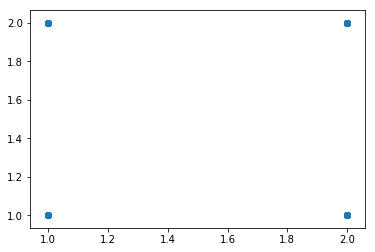

In [185]:
# random forest

plt.scatter(preds_valid, y_valid)
plt.show()